In [1]:
import pandas as pd
import numpy as np
from features import make_transformer, engineer
from evaluator import evaluate_model

In [13]:
train_df = pd.read_parquet("../Data/train_final_v3.parquet")
val_df = pd.read_parquet("../Data/validationA_v3.parquet")
valB_df = pd.read_parquet("../Data/validationB_v3.parquet")
test_df = pd.read_parquet("../Data/test_v3.parquet")

In [15]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(112768, 791)
(24164, 791)
(40274, 791)


In [17]:
X_train = train_df.drop(columns=['match'], axis=1)
X_val = val_df.drop(columns=['match'], axis=1)
X_valB = valB_df.drop(columns=['match'], axis=1)
X_test = test_df.drop(columns=['match'], axis=1)
y_train = train_df['match']
y_val = val_df['match']
y_valB = valB_df['match']
y_test = test_df['match']

In [7]:
import sys
from pathlib import Path

project_root = Path().resolve().parent   
sys.path.insert(0, str(project_root / "src"))

In [39]:
transformer = make_transformer(engineer(X_train), r=50, s=10)
X_train_proc = transformer.fit_transform(engineer(X_train))
X_val_proc = transformer.transform(engineer(X_val))
X_test_proc = transformer.transform(engineer(X_test))

In [45]:
import joblib

model_5 = joblib.load("../Models/model_5.pkl")
voting2 =  joblib.load("../Models/voting2.pkl")

 Validation Results:
Recall (macro):     0.7713
F1-score (macro):   0.4409
PR-AUC:             0.0974
              precision    recall  f1-score   support

           0       1.00      0.73      0.84     40000
           1       0.02      0.81      0.04       274

    accuracy                           0.73     40274
   macro avg       0.51      0.77      0.44     40274
weighted avg       0.99      0.73      0.84     40274



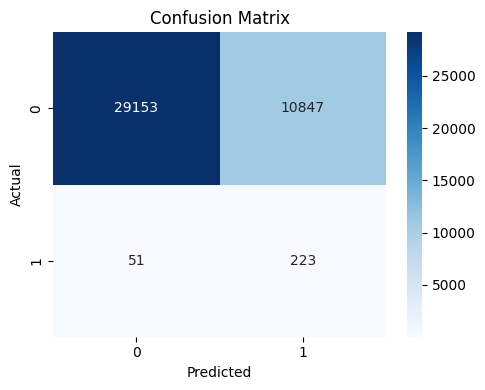

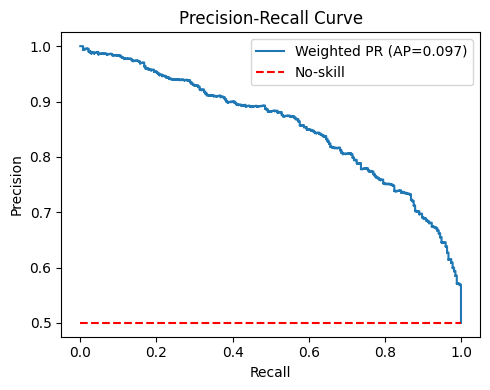

In [43]:
evaluate_model(model_5, X_test_proc, y_test)

 Validation Results:
Recall (macro):     0.7820
F1-score (macro):   0.4412
PR-AUC:             0.1150
              precision    recall  f1-score   support

           0       1.00      0.73      0.84     40000
           1       0.02      0.84      0.04       274

    accuracy                           0.73     40274
   macro avg       0.51      0.78      0.44     40274
weighted avg       0.99      0.73      0.84     40274



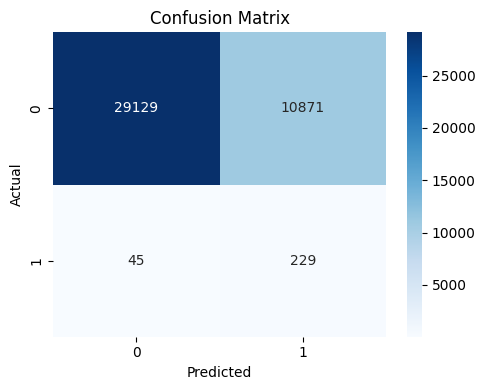

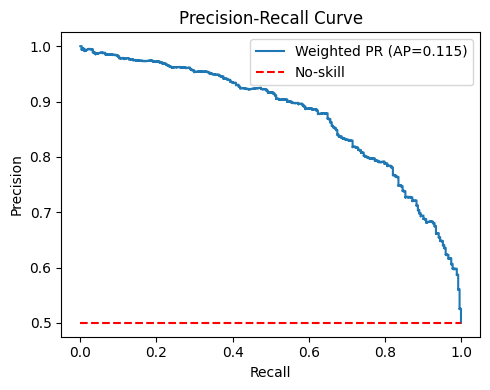

In [47]:
evaluate_model(voting2, X_test_proc, y_test)